# Misura della fase ad una sola frequenza VNA fissata, al variare della frequenza di SMA
### Misuro le frequenze di eccitazione del qubit

In [53]:
import h5py
import numpy as np
from h5utils import *
import matplotlib.pyplot as plt
from matplotlib import cm
import sys

### Dati:
- misura_vario_SMA_13_06.h5
- misura_variaSMA_12_06.h5

In [54]:
filename = "../INTERESSANTI/misura_variaSMA_12_06.h5";   # Change HERE!!!
#pow_vec = np.linspace(-30,-50,9)
sma_pow = -20 #[dBm]

Here you can see the content of the file

In [55]:
"""PRINT ALL the .h5 file directories"""
h5dump(filename,group = "/");

	 [ 0 ] - <HDF5 group "/" (2 members)>
		 [ 0 ] - <HDF5 group "/SMA_power-20dBm" (801 members)>
			 [ 0 ]- /SMA_power-20dBm/drive_freq0 : (3, 40)
			 [ 1 ]- /SMA_power-20dBm/drive_freq1 : (3, 40)
			 [ 2 ]- /SMA_power-20dBm/drive_freq10 : (3, 40)
			 [ 3 ]- /SMA_power-20dBm/drive_freq100 : (3, 40)
			 [ 4 ]- /SMA_power-20dBm/drive_freq101 : (3, 40)
			 [ 5 ]- /SMA_power-20dBm/drive_freq102 : (3, 40)
			 [ 6 ]- /SMA_power-20dBm/drive_freq103 : (3, 40)
			 [ 7 ]- /SMA_power-20dBm/drive_freq104 : (3, 40)
			 [ 8 ]- /SMA_power-20dBm/drive_freq105 : (3, 40)
			 [ 9 ]- /SMA_power-20dBm/drive_freq106 : (3, 40)
			 [ 10 ]- /SMA_power-20dBm/drive_freq107 : (3, 40)
			 [ 11 ]- /SMA_power-20dBm/drive_freq108 : (3, 40)
			 [ 12 ]- /SMA_power-20dBm/drive_freq109 : (3, 40)
			 [ 13 ]- /SMA_power-20dBm/drive_freq11 : (3, 40)
			 [ 14 ]- /SMA_power-20dBm/drive_freq110 : (3, 40)
			 [ 15 ]- /SMA_power-20dBm/drive_freq111 : (3, 40)
			 [ 16 ]- /SMA_power-20dBm/drive_freq112 : (3, 40)
			 [ 17 ]- /SMA_po

			 [ 243 ]- /SMA_power-50dBm/drive_freq317 : (3, 40)
			 [ 244 ]- /SMA_power-50dBm/drive_freq318 : (3, 40)
			 [ 245 ]- /SMA_power-50dBm/drive_freq319 : (3, 40)
			 [ 246 ]- /SMA_power-50dBm/drive_freq32 : (3, 40)
			 [ 247 ]- /SMA_power-50dBm/drive_freq320 : (3, 40)
			 [ 248 ]- /SMA_power-50dBm/drive_freq321 : (3, 40)
			 [ 249 ]- /SMA_power-50dBm/drive_freq322 : (3, 40)
			 [ 250 ]- /SMA_power-50dBm/drive_freq323 : (3, 40)
			 [ 251 ]- /SMA_power-50dBm/drive_freq324 : (3, 40)
			 [ 252 ]- /SMA_power-50dBm/drive_freq325 : (3, 40)
			 [ 253 ]- /SMA_power-50dBm/drive_freq326 : (3, 40)
			 [ 254 ]- /SMA_power-50dBm/drive_freq327 : (3, 40)
			 [ 255 ]- /SMA_power-50dBm/drive_freq328 : (3, 40)
			 [ 256 ]- /SMA_power-50dBm/drive_freq329 : (3, 40)
			 [ 257 ]- /SMA_power-50dBm/drive_freq33 : (3, 40)
			 [ 258 ]- /SMA_power-50dBm/drive_freq330 : (3, 40)
			 [ 259 ]- /SMA_power-50dBm/drive_freq331 : (3, 40)
			 [ 260 ]- /SMA_power-50dBm/drive_freq332 : (3, 40)
			 [ 261 ]- /SMA_power-50dBm/

In [56]:
"""Get simulation parameters"""
# Print [Check if the order of paramerers is the same of the assegnation below!]

params_names, params_values = getDatasetValue(filename,"/SMA_power"+str(sma_pow)+"dBm",-1)
for i in np.arange(0,len(params_names)):
    print(str(params_names[i].decode("utf-8")),": ",str(params_values[i].decode("utf-8")))

params_names, params_values = getDatasetValue(filename,"/SMA_power"+str(sma_pow)+"dBm/",-1)

# Print [Check if the order of paramerers is the same of the assegnation below!]
for i in np.arange(0,len(params_names)):
    print(str(params_names[i].decode("utf-8")),": ",str(params_values[i].decode("utf-8")))

# Vna
powerdBm = float(params_values[1]) #[dBm]
npts = int(params_values[7])
vna_freq_start = float(params_values[2])
vna_freq_stop = float(params_values[3])
# Sma
freq_start = float(params_values[4])/1e9 #[GHz]
freq_stop = float(params_values[5])/1e9 #[Ghz]
n_freq = int(params_values[6])

freqs = np.linspace(freq_start, freq_stop, n_freq) 
vna_freqs = np.linspace(vna_freq_start, vna_freq_stop, npts)

"""Print parameters arrays"""
print("\n\nIndex:\n")
temp_str = ""
freq_cifers = 3
for i in np.arange(0,n_freq):
    temp_str = temp_str + "[" + str(i) + "] " + str(round(freqs[i], freq_cifers)) + "; "
print("SMA frequencies (GHz): ",temp_str)

sma_pow :  -20
vna_pow :  -25
vna_freq_start :  8574500000.0
vna_freq_stop :  8574500000.0
fmin_sma :  6000000000.0
fmax_sma :  6800000000.0
nfreqs :  800
npoints :  40
sma_pow :  -20
vna_pow :  -25
vna_freq_start :  8574500000.0
vna_freq_stop :  8574500000.0
fmin_sma :  6000000000.0
fmax_sma :  6800000000.0
nfreqs :  800
npoints :  40


Index:

SMA frequencies (GHz):  [0] 6.0; [1] 6.001; [2] 6.002; [3] 6.003; [4] 6.004; [5] 6.005; [6] 6.006; [7] 6.007; [8] 6.008; [9] 6.009; [10] 6.01; [11] 6.011; [12] 6.012; [13] 6.013; [14] 6.014; [15] 6.015; [16] 6.016; [17] 6.017; [18] 6.018; [19] 6.019; [20] 6.02; [21] 6.021; [22] 6.022; [23] 6.023; [24] 6.024; [25] 6.025; [26] 6.026; [27] 6.027; [28] 6.028; [29] 6.029; [30] 6.03; [31] 6.031; [32] 6.032; [33] 6.033; [34] 6.034; [35] 6.035; [36] 6.036; [37] 6.037; [38] 6.038; [39] 6.039; [40] 6.04; [41] 6.041; [42] 6.042; [43] 6.043; [44] 6.044; [45] 6.045; [46] 6.046; [47] 6.047; [48] 6.048; [49] 6.049; [50] 6.05; [51] 6.051; [52] 6.052; [53] 6.05

Text(0.5, 1.0, 'SMA power: -20 dBm; VNA power: -25.0 dBm')

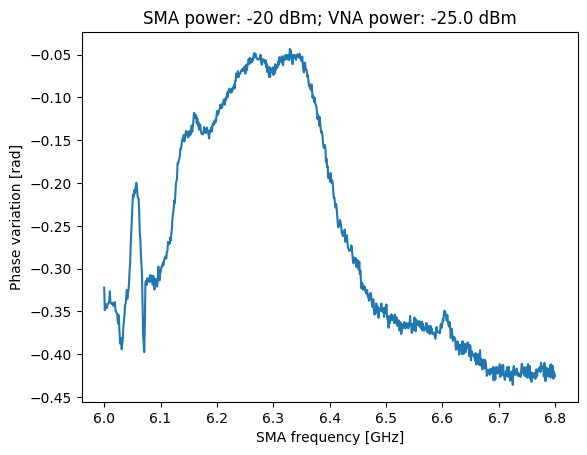

In [57]:
"""Calcolo la media di MLOG o PHASE fra tutte le 40 misure a frequenza VNA e frequenza SMA uguali"""

group = "/SMA_power"+str(sma_pow)+"dBm/"
# Retrieve data from the specified dataset
datasets = getDatasets(filename,group,0)
hf = h5py.File(filename, 'r')
hfg = hf[group]
gain_average = np.zeros(n_freq)
phase_average = np.zeros(n_freq)
for i in np.arange(0,n_freq):
    dataset_mat = hfg.get("drive_freq"+str(i))
    f = dataset_mat[0]
    I = dataset_mat[1]
    Q = dataset_mat[2]
    S21dB = 20*np.log10(np.sqrt(np.multiply(I,I)+np.multiply(Q,Q)))
    gain_average[i] = np.mean(S21dB)
    phase_average[i] = np.mean(np.arctan2(Q,I))
hf.close()

fig, ax = plt.subplots()
ax.plot(freqs,phase_average)
ax.set_xlabel('SMA frequency [GHz]')
ax.set_ylabel('Phase variation [rad]')
ax.set_title('SMA power: '+str(sma_pow)+' dBm; VNA power: '+str(powerdBm)+' dBm')

### Tutte le misure

sma_pow :  -20
vna_pow :  -25
vna_freq_start :  8574500000.0
vna_freq_stop :  8574500000.0
fmin_sma :  6000000000.0
fmax_sma :  6800000000.0
nfreqs :  800
npoints :  40


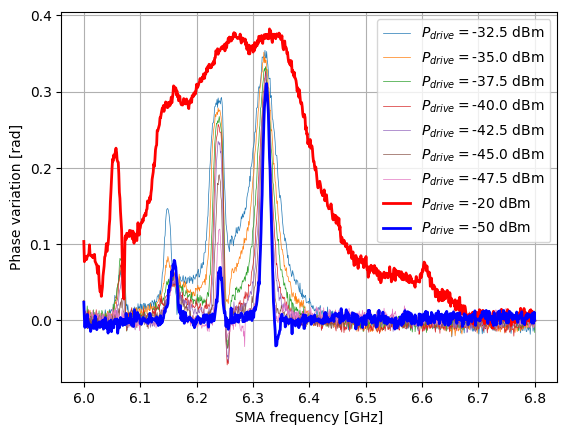

In [74]:
# SMA freqs
params_names, params_values = getDatasetValue("../INTERESSANTI/misura_variaSMA_12_06.h5","/SMA_power-20dBm",-1)
for i in np.arange(0,len(params_names)):
    print(str(params_names[i].decode("utf-8")),": ",str(params_values[i].decode("utf-8")))

freq_start = float(params_values[4])/1e9 #[GHz]
freq_stop = float(params_values[5])/1e9 #[Ghz]
n_freq = int(params_values[6])
freqs = np.linspace(freq_start, freq_stop, n_freq)

# Read all measurements and calculate the mean of the phase x each f_drive (we make 40 measure at the same f_vna x each f_sma)
sma_pow_vec = np.linspace(-30,-50,9)
sma_pow_vec = sma_pow_vec[1:-1]

fig, ax = plt.subplots()
# Plot INTERMEDIATE powers
filename = "../INTERESSANTI/misura_variaSMA_13_06.h5"
for sma_pow in sma_pow_vec:
    group = "/SMA_power"+str(sma_pow)+"dBm/"
    # Retrieve data from the specified dataset
    datasets = getDatasets(filename,group,0)
    hf = h5py.File(filename, 'r')
    hfg = hf[group]
    gain_average = np.zeros(n_freq)
    phase_average = np.zeros(n_freq)
    for i in np.arange(0,n_freq):
        dataset_mat = hfg.get("drive_freq"+str(i))
        f = dataset_mat[0]
        I = dataset_mat[1]
        Q = dataset_mat[2]
        S21dB = 20*np.log10(np.sqrt(np.multiply(I,I)+np.multiply(Q,Q)))
        gain_average[i] = np.mean(S21dB)
        phase_average[i] = np.mean(np.arctan2(Q,I))
    hf.close()
    ax.plot(freqs,phase_average, label = '$P_{drive} = $' + str(sma_pow) + " dBm", linewidth = 0.5)

# Plot EXTREMAL powers
filename = "../INTERESSANTI/misura_variaSMA_12_06.h5"
sma_pow_vec = np.array([-20, -50])
col_vec = ["red", "blue"]
col_index = 0
for sma_pow in sma_pow_vec:
    group = "/SMA_power"+str(sma_pow)+"dBm/"
    # Retrieve data from the specified dataset
    datasets = getDatasets(filename,group,0)
    hf = h5py.File(filename, 'r')
    hfg = hf[group]
    gain_average = np.zeros(n_freq)
    phase_average = np.zeros(n_freq)
    for i in np.arange(0,n_freq):
        dataset_mat = hfg.get("drive_freq"+str(i))
        f = dataset_mat[0]
        I = dataset_mat[1]
        Q = dataset_mat[2]
        S21dB = 20*np.log10(np.sqrt(np.multiply(I,I)+np.multiply(Q,Q)))
        gain_average[i] = np.mean(S21dB)
        phase_average[i] = np.mean(np.arctan2(Q,I))
    hf.close()
    # Take difference with a value at 6.8 GHz, beacause there there are no exit freqs
    ax.plot(freqs,phase_average-phase_average[-1], label = '$P_{drive} = $' + str(sma_pow) + " dBm", linewidth = 2, color = col_vec[col_index])
    col_index = col_index + 1

ax.set_xlabel('SMA frequency [GHz]')
ax.set_ylabel('Phase variation [rad]')
ax.legend()
ax.grid()